# Data Visualization in Python
LAND ICE MASS DATA, provided by David Wiese. Retrieved from: http://climate.nasa.gov/vital-signs/land-ice/
- Greenland Trend (2002 - 2014): -287 Gt/yr
- Antarctica Trend (2002 - 2014): -134 Gt/yr

In [2]:
import pandas as pd 
pd.set_option('max_rows', 10)

data = pd.read_csv('simple_land_ice_mass_data.csv')
print(data)

     TIME (year.decimal fraction)  Greenland mass (Gt)  Antarctica mass (Gt)
0                         2002.29              1490.68                967.20
1                         2002.35              1485.69                978.55
2                         2002.62              1286.84                512.02
3                         2002.71              1257.85                858.85
4                         2002.79              1257.17                693.87
..                            ...                  ...                   ...
135                       2014.45             -1672.08              -1021.70
136                       2014.62             -1985.59              -1067.84
137                       2014.71             -2024.82               -780.87
138                       2014.79             -1973.96               -904.38
139                       2014.88             -1911.78              -1009.80

[140 rows x 3 columns]


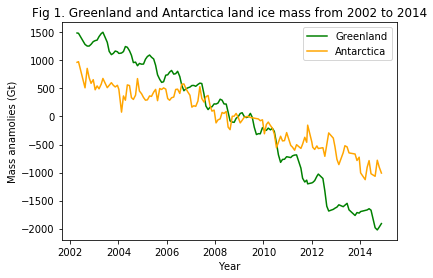

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

time = data["TIME (year.decimal fraction)"]
greenland = data["Greenland mass (Gt)"]
antarctica = data["Antarctica mass (Gt)"]

g_color, a_color = "green", "orange"
mass_lb, yr_lb = "Mass anamolies (Gt)", "Year"

plt.plot(time, greenland, color = g_color, label = 'Greenland')
plt.plot(time, antarctica, color = a_color, label = 'Antarctica')

plt.title("Fig 1. Greenland and Antarctica land ice mass from 2002 to 2014")
plt.xlabel(yr_lb)
plt.ylabel(mass_lb)
plt.legend() 
plt.show()

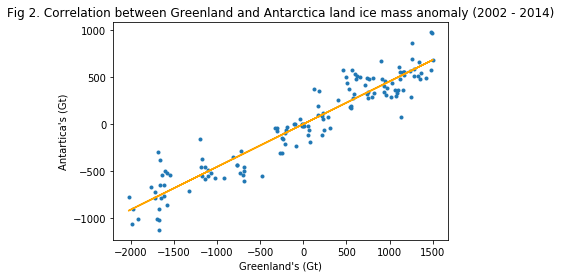

In [4]:
import numpy as np

plt.scatter(greenland, antarctica, edgecolor = 'face', marker = ".")

#draw best-fit line
m, b = np.polyfit(greenland, antarctica, 1)
plt.plot(greenland, m*greenland + b, color = "orange")

plt.title("Fig 2. Correlation between Greenland and Antarctica land ice mass anomaly (2002 - 2014)")
plt.xlabel("Greenland's (Gt)")
plt.ylabel("Antartica's (Gt)")
plt.show()

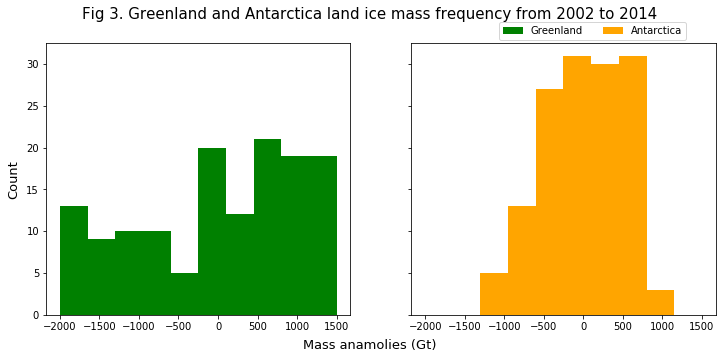

In [5]:
n_bins = 10
common_range = (-2000, 1500)

fig, axs = plt.subplots(1, 2, sharey=True, figsize = (12,5))
axs[0].hist(greenland, bins=n_bins, color = g_color, label = 'Greenland', range = common_range)
axs[1].hist(antarctica, bins=n_bins, color = a_color, label = 'Antarctica', range = common_range)

fig.suptitle('Fig 3. Greenland and Antarctica land ice mass frequency from 2002 to 2014', size = 15)
fig.text(0.5, 0.03, mass_lb, ha='center', size = 13)
fig.text(0.08, 0.5, 'Count', va='center', rotation='vertical', size = 13)
fig.legend(bbox_to_anchor=(0.8, 0.95), ncol = 2)

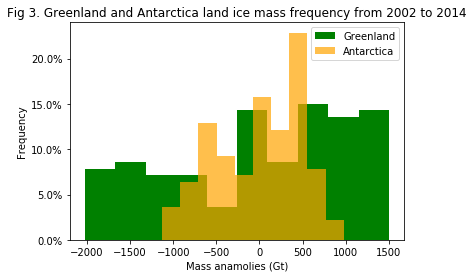

In [6]:
from matplotlib.ticker import PercentFormatter
area = np.ones(len(data)) / len(data)

plt.hist(greenland, bins = n_bins, weights = area, label = 'Greenland', color = g_color)
plt.hist(antarctica, bins = n_bins, weights = area, label = 'Antarctica', alpha = 0.7, color = a_color)

plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))

plt.legend()
plt.title('Fig 3. Greenland and Antarctica land ice mass frequency from 2002 to 2014')
plt.xlabel(mass_lb)
plt.ylabel('Frequency')
plt.show()

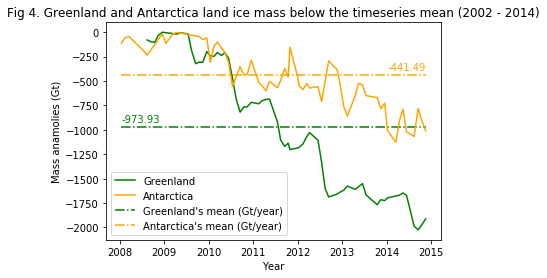

In [7]:
#g_color, a_color = "green", "orange"
g_focus = greenland < 0
a_focus = antarctica < 0

g_mean = round(np.mean(greenland[g_focus]), 2)
a_mean = round(np.mean(antarctica[a_focus]), 2)

start_yr = min(time[g_focus].iloc[0], time[a_focus].iloc[0])
end_yr = max(time[g_focus].iloc[-1], time[a_focus].iloc[-1])

plt.plot(time[g_focus], greenland[g_focus], color = g_color, label = 'Greenland')
plt.plot(time[a_focus], antarctica[a_focus], color = a_color, label = 'Antarctica')

#plot the average horizontal lines and annotate them
plt.hlines(g_mean, start_yr, end_yr, color = g_color, linestyles = "dashdot", label = "Greenland's mean (Gt/year)")
plt.text(start_yr, g_mean + 50, g_mean, color = g_color)
plt.hlines(a_mean, start_yr, end_yr, color = a_color, linestyles = "dashdot", label = "Antarctica's mean (Gt/year)")
plt.text(end_yr - 0.85, a_mean + 50, a_mean, color = a_color)

plt.title("Fig 4. Greenland and Antarctica land ice mass below the timeseries mean (2002 - 2014)")
plt.xlabel(yr_lb)
plt.ylabel(mass_lb)
plt.legend() 
plt.show()

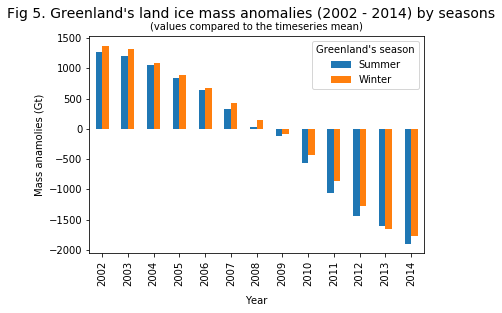

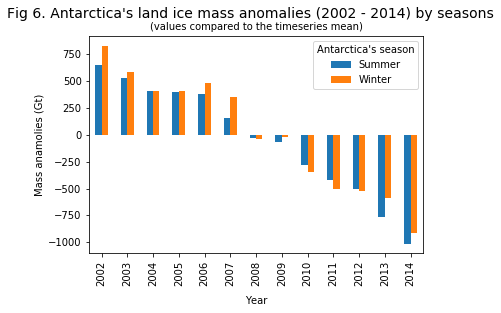

In [8]:
g_hd, a_hd = "Greenland mass (Gt)", "Antarctica mass (Gt)"
yr_hd, g_season_hd, a_season_hd = "Year", "Greenland's season", "Antarctica's season"
g_summer_st, g_summer_end = 5/12, 9/12 #Summer from June to September
a_winter_st, a_winter_end = 3/12, 9/12 #Summer from October to February
g_season, a_season = [], []

data[yr_hd] = time
data = data.astype({yr_hd: int})
year = data[yr_hd]

for i in range(len(data.index)):
    if  time[i] % 1 >= g_summer_st and time[i] % 1 <= g_summer_end:
        g_season.append("Summer")
    else:
        g_season.append("Winter")
        
for i in range(len(data.index)):
    if time[i] % 1 >= a_winter_st and time[i] % 1 <= a_winter_end:
        a_season.append("Winter")
    else:
        a_season.append("Summer")

data[g_season_hd], data[a_season_hd] = g_season, a_season

data.groupby([yr_hd, g_season_hd])[g_hd].mean().unstack(1).plot.bar()
plt.ylabel(mass_lb)
plt.xlabel(yr_lb, labelpad = 10)
plt.suptitle("Fig 5. Greenland's land ice mass anomalies (2002 - 2014) by seasons").set_size(14)
plt.title("(values compared to the timeseries mean)").set_size(10)

data.groupby([yr_hd, a_season_hd])[a_hd].mean().unstack(1).plot.bar()
plt.ylabel(mass_lb)
plt.xlabel(yr_lb, labelpad = 10)
plt.suptitle("Fig 6. Antarctica's land ice mass anomalies (2002 - 2014) by seasons").set_size(14)
plt.title("(values compared to the timeseries mean)").set_size(10)